In [1]:
# coding: utf-8
import sys
sys.path.append('..')
from util import config
from util.np import *
import pickle
from util.trainer import Trainer
from util.optimizer import Adam
from model.simple_CBOW import CBOW
from model.simple_Skipgram import SkipGram
from util.tools import create_contexts_target, to_cpu, to_gpu
from dataset import ptb
import matplotlib

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [3]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

In [4]:
contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)


In [5]:
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| epoch 1 |  iter 1 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 41 / 9295 | time 0[s] | loss 4.15
| epoch 1 |  iter 61 / 9295 | time 1[s] | loss 4.12
| epoch 1 |  iter 81 / 9295 | time 1[s] | loss 4.04
| epoch 1 |  iter 101 / 9295 | time 1[s] | loss 3.90
| epoch 1 |  iter 121 / 9295 | time 1[s] | loss 3.76
| epoch 1 |  iter 141 / 9295 | time 1[s] | loss 3.61
| epoch 1 |  iter 161 / 9295 | time 1[s] | loss 3.49
| epoch 1 |  iter 181 / 9295 | time 1[s] | loss 3.35
| epoch 1 |  iter 201 / 9295 | time 2[s] | loss 3.25
| epoch 1 |  iter 221 / 9295 | time 2[s] | loss 3.17
| epoch 1 |  iter 241 / 9295 | time 2[s] | loss 3.10
| epoch 1 |  iter 261 / 9295 | time 2[s] | loss 3.02
| epoch 1 |  iter 281 / 9295 | time 2[s] | loss 2.98
| epoch 1 |  iter 301 / 9295 | time 2[s] | loss 2.91
| epoch 1 |  iter 321 / 9295 | time 3[s] | loss 2.91
| epoch 1 |  iter 341 / 9295 | time 3[s] | loss 2.84
| epoch 1 |  iter 361 / 9295 | time 3[s] | loss 2.83

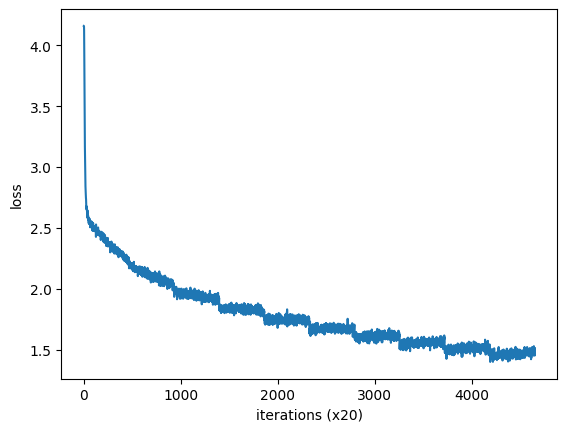

In [6]:
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [7]:
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'  # or 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)